In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv('amazon.csv')
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [77]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
avg_rating_for_Each_category= df.groupby('category')['rating'].mean()
avg_rating_for_Each_category

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


In [78]:
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

avg_ratingcount_for_Each_category= df.groupby('category')['rating_count'].mean()


In [79]:
import re
df['actual_price'] = df['actual_price'].apply(
    lambda x: float(re.sub(r'[^\d.]', '', str(x))) if isinstance(x, str) else float(x)
)

# Filter rows where the discounted_price value is not a string (i.e. already numeric)
df['discounted_price'] = df['discounted_price'].apply(
    lambda x: float(re.sub(r'[^\d.]', '', str(x))) if isinstance(x, str) else float(x)
)
df.discounted_price

,discounted_price
0,399.0
1,199.0
2,199.0
3,329.0
4,154.0
...,...
1460,379.0
1461,2280.0
1462,2219.0
1463,1399.0


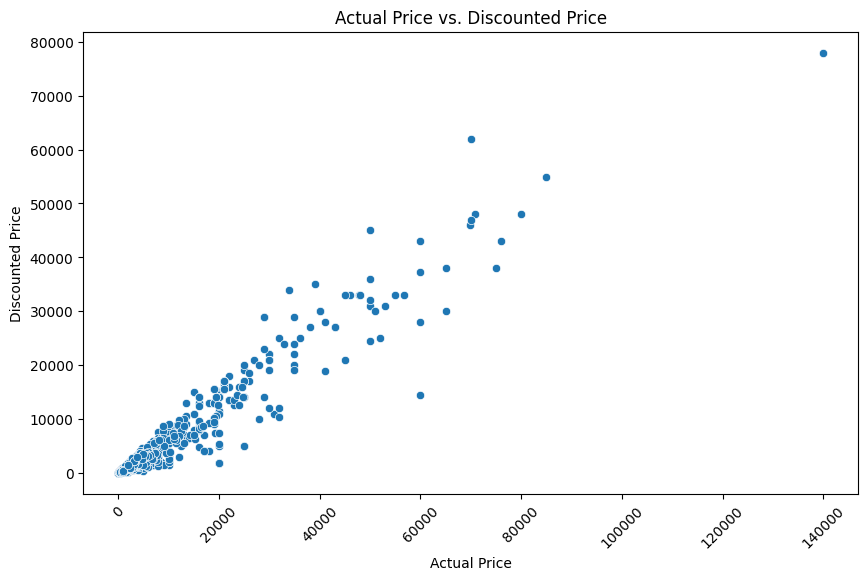

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='discounted_price',data=df, palette='viridis')
plt.title('Actual Price vs. Discounted Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.xticks(rotation=45)
plt.show()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   object 
 6   rating               1464 non-null   float64
 7   rating_count         326 non-null    float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [82]:
df.discount_percentage.value_counts()

,count
discount_percentage,
50%,56
60%,56
0%,49
80%,37
55%,36
...,...
2%,2
7%,2
94%,1


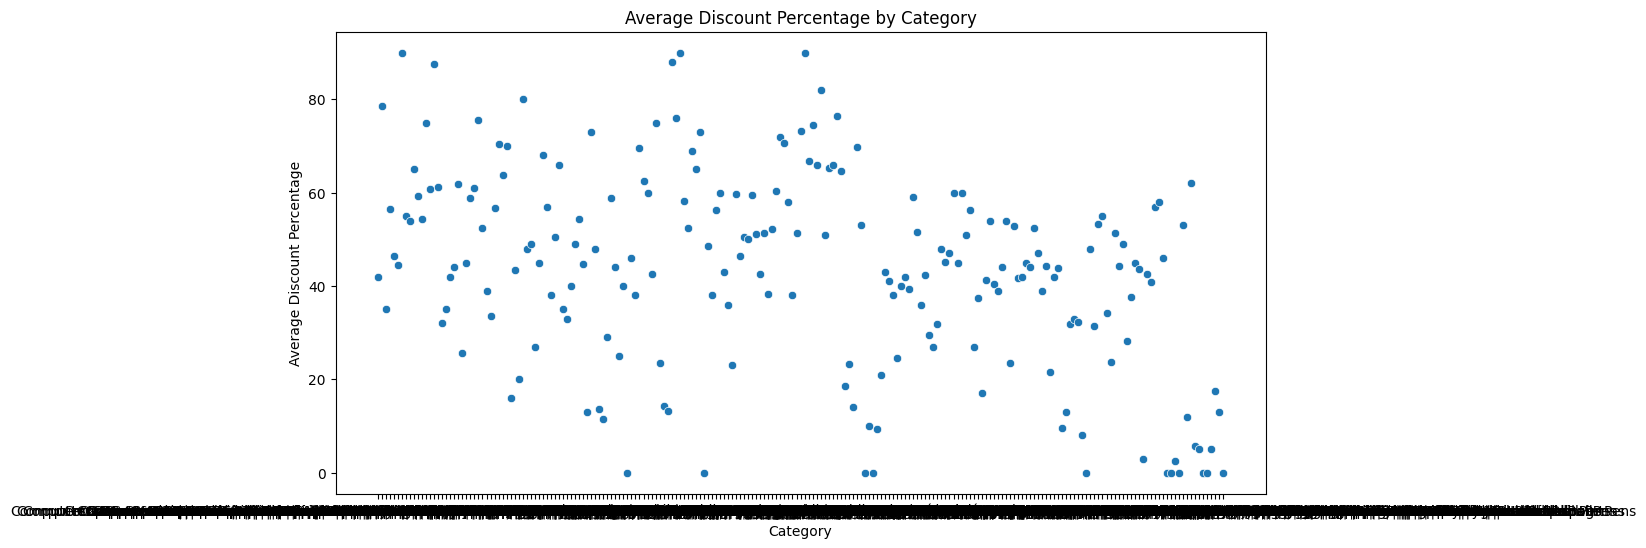

In [83]:

df['discount_percentage_clean'] = pd.to_numeric(
    df['discount_percentage'].str.rstrip('%').str.replace(',', ''),
    errors='coerce'
)

avg_discount = df.groupby('category')['discount_percentage_clean'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=avg_discount, x='category', y='discount_percentage_clean', palette='viridis')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.title('Average Discount Percentage by Category')
plt.show()


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   product_id                 1465 non-null   object 
 1   product_name               1465 non-null   object 
 2   category                   1465 non-null   object 
 3   discounted_price           1465 non-null   float64
 4   actual_price               1465 non-null   float64
 5   discount_percentage        1465 non-null   object 
 6   rating                     1464 non-null   float64
 7   rating_count               326 non-null    float64
 8   about_product              1465 non-null   object 
 9   user_id                    1465 non-null   object 
 10  user_name                  1465 non-null   object 
 11  review_id                  1465 non-null   object 
 12  review_title               1465 non-null   object 
 13  review_content             1465 non-null   objec

In [85]:
popular_product=df.product_name.value_counts().reset_index()
popular_product.head()
#top 5 popular product


,product_name,count
0,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
1,Fire-Boltt Phoenix Smart Watch with Bluetooth ...,4
2,Wayona Nylon Braided USB to Lightning Fast Cha...,3
3,MI Braided USB Type-C Cable for Charging Adapt...,3
4,Amazonbasics Nylon Braided Usb-C To Lightning ...,3


In [86]:
import pandas as pd
import re
from collections import Counter

all_names = ' '.join(df['about_product'].dropna())

words = re.findall(r'\w+', all_names.lower())

stopwords = {"and", "the", "of", "in", "for", "a", "an", "with", "on"}

filtered_words = [word for word in words if word not in stopwords]

word_counts = Counter(filtered_words)

most_common_keywords = word_counts.most_common(10)
print(most_common_keywords)


[('to', 3846), ('your', 1869), ('is', 1483), ('1', 1385), ('you', 1355), ('usb', 1230), ('it', 1172), ('2', 1025), ('or', 976), ('can', 920)]


In [88]:
popular_reviews = df['review_title'].value_counts().reset_index()
print(popular_reviews.head())


                                        review_title  count
0  Worked on iPhone 7 and didn’t work on XR,Good ...     10
1  Satisfied,Charging is really fast,Value for mo...      8
2  Phone, camera, heating - works for me, may not...      8
3  Good product,Good one,Nice,Really nice product...      7
4  A Good Braided Cable for Your Type C Device,Go...      7


correlation between discounted price and rating  0.12033741712288548


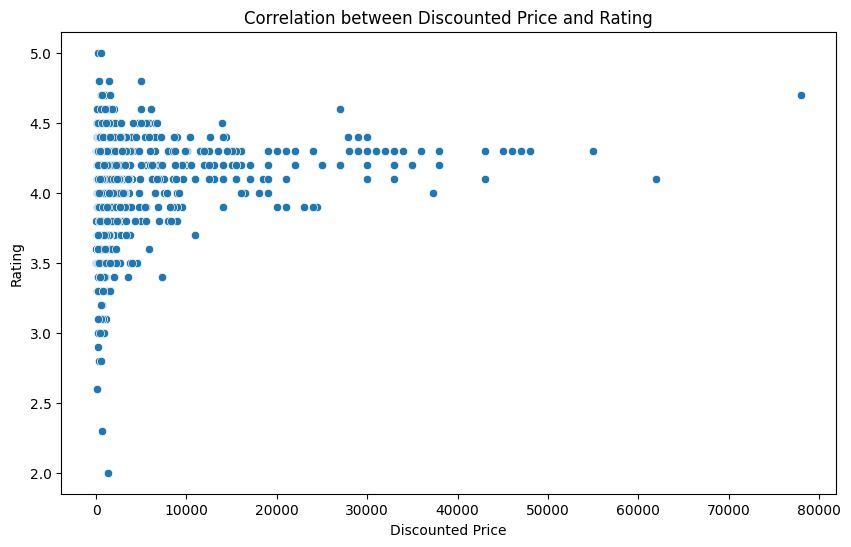

In [90]:
corelation_price_rating=df.discounted_price.corr(df.rating)
print("correlation between discounted price and rating ",corelation_price_rating)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='rating', data=df)
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.title('Correlation between Discounted Price and Rating')
plt.show()

In [92]:
top_five_categories=df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(top_five_categories)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64
